# 範例

根據以下的參考點，嘗試做透視變換

```
point1 = np.array([[60, 40], [420, 40], [420, 510], [60, 510]], dtype=np.float32)
point2 = np.array([[0, 80], [w, 120], [w, 430], [0, 470]], dtype=np.float32)
```

In [1]:
import cv2
import numpy as np
import IPython.display as display
from PIL import Image
from io import BytesIO

img = cv2.imread('images/lena.png')

In [2]:
def imshow(a, fmt='png'):
    if len(a.shape) == 3:
        a = a[:, :, ::-1]
    a = np.uint8(np.clip(a, 0, 255))
    c = BytesIO()
    Image.fromarray(a).save(c, fmt)
    display.display(display.Image(data=c.getvalue()))

## 透視轉換

perspective transform


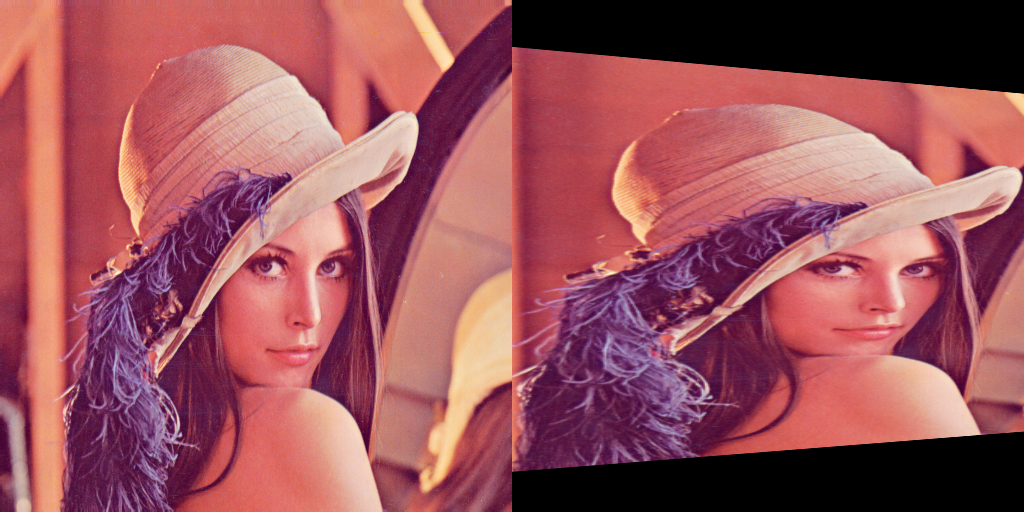

In [3]:
img_perspective = img.copy()
h, w = img.shape[:2]

# 設定四對點，並取得 perspective 矩陣
point1 = np.array([[60, 40], [420, 40], [420, 510], [60, 510]], dtype=np.float32)
point2 = np.array([[0, 80], [w, 120], [w, 430], [0, 470]], dtype=np.float32)
M = cv2.getPerspectiveTransform(point1, point2)

# perspective 轉換
img_perspective = cv2.warpPerspective(img, M, (w, h))

# 組合 + 顯示圖片
img_show = np.hstack((img, img_perspective))
print('perspective transform')
imshow(img_show)